### Genre Classification from Lyrics

In [3]:
import numpy as np
import pandas as pd
import os
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
DATA_DIR="data/"
from sklearn.preprocessing import LabelEncoder
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

genres = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock', 'Other', 'Not Available']
le = LabelEncoder()
le.fit(genres)
le.inverse_transform([i for i in range(len(genres))])

array(['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Not Available', 'Other', 'Pop', 'R&B', 'Rock'],
      dtype='<U13')

In [4]:
with open(DATA_DIR+"metrolyrics_languages.pickle","rb") as f:
    metrodata=pickle.load(f)
print("MetroLyrics data", metrodata.shape)
# arr = np.load("data/metrolyrics_language_feature_vectors.npy")
# doc2vecData = pd.DataFrame(arr,index=None,columns=None)
# print("Lyrics doc2vec data", doc2vecData.shape)

arr = np.load("data/trained_d2v_vectors.npy")
doc2vecData = pd.DataFrame(arr,index=None,columns=None)
print("Lyrics doc2vec data", doc2vecData.shape)

# doc2vecData = doc2vecData[(metrodata.genre != 'Other') & (metrodata.genre != 'Not Available')]
# metrodata = metrodata[(metrodata.genre != 'Other') & (metrodata.genre != 'Not Available')]

MetroLyrics data (155954, 4)
Lyrics doc2vec data (155954, 300)


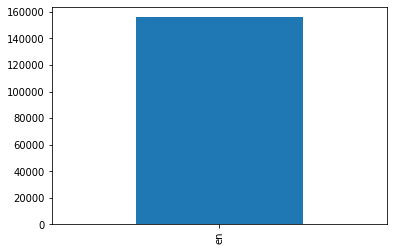

In [75]:
metrodata['lang'].value_counts().plot.bar()

In [5]:
vectors = doc2vecData.values
labels = metrodata[['genre']].values.flatten()
y_data = le.transform(labels)
print("x data:", vectors.shape)
print("y data:", labels.shape)

x data: (155954, 300)
y data: (155954,)


In [6]:
x_data = vectors[(y_data != 8) & (y_data != 7)]
y_data = y_data[(y_data != 8) & (y_data != 7)]

In [7]:
print("x data:", x_data.shape)
print("y data:", y_data.shape)

x data: (143032, 300)
y data: (143032,)


In [8]:
cx_data = (x_data - np.mean(x_data, axis=0))/np.std(x_data, axis=0)

### PCA

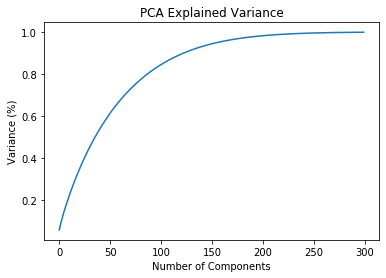

In [74]:
pca = PCA().fit(x_data)
plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA Explained Variance')
plt.ion()
plt.show()

In [75]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
comps_num = int(np.argmax(cum_sum>=.988))
comps_num

212

In [76]:
pca = PCA(n_components=212)
x_data_pca = pca.fit_transform(x_data) 
print(pca.explained_variance_ratio_.sum())

0.987732769022802


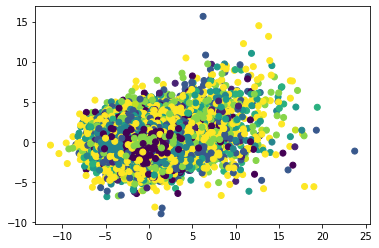

In [77]:
plt.scatter(x_data_pca[:, 0], x_data_pca[:, 1], c=y_data)

### Linear Discriminant Analysis

In [82]:
clf = LinearDiscriminantAnalysis(n_components=9)

In [83]:
x_data_lda = clf.fit_transform(x_data, y_data)

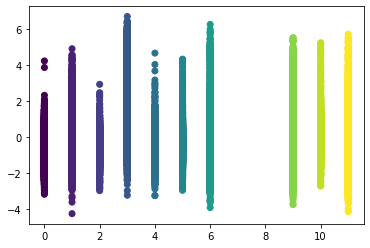

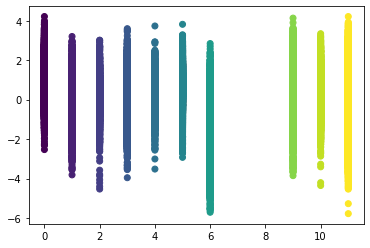

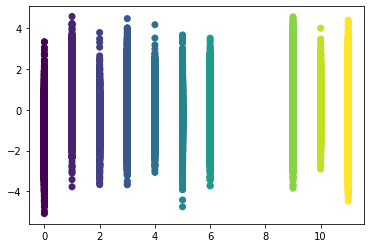

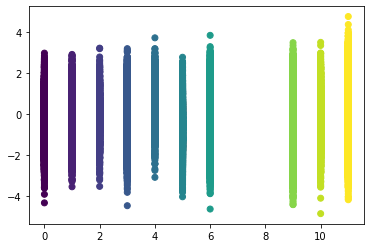

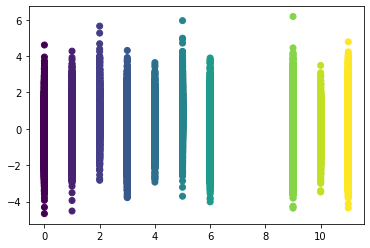

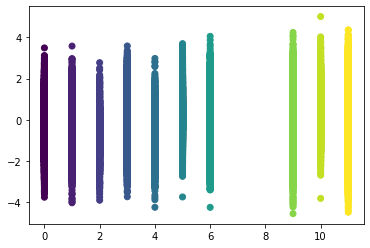

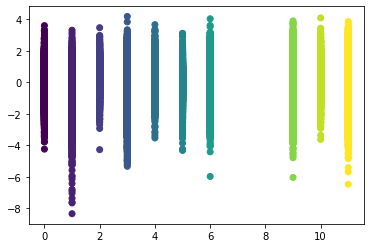

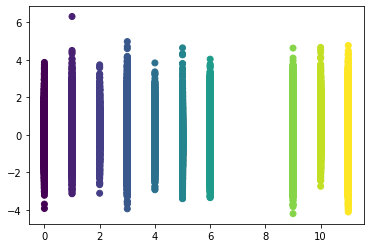

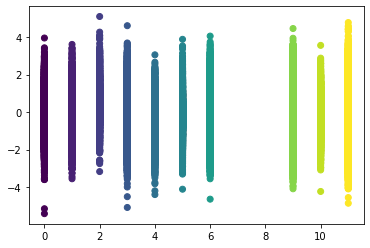

In [84]:
for i in range(9):
    plt.scatter(y_data, x_data_lda[:, i], c=y_data)
    plt.show()

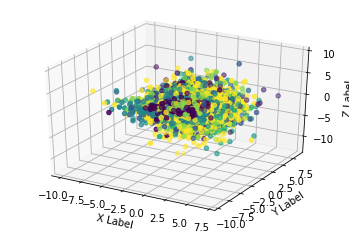

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

clf = LinearDiscriminantAnalysis(n_components=3)
x_data_lda = clf.fit_transform(x_data, y_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data_lda[:,0], x_data_lda[:, 1], x_data_lda[:,2], c=y_data, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Classification Models

In [93]:
['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

['Country',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Metal',
 'Pop',
 'R&B',
 'Rock']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(cx_data, y_data, test_size=0.6, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

Train Score: 0.3574250157309655
Test Score: 0.33708925658354694


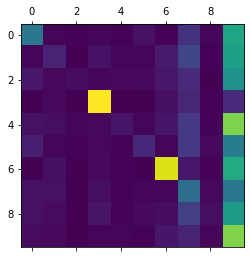

In [87]:
classifier = LogisticRegression(class_weight="balanced", solver="lbfgs", multi_class='multinomial', max_iter=1000)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

Train Score: 0.5586240648814934
Test Score: 0.42084595665346075


In [ ]:
classifier = SVC(class_weight="balanced", gamma="scale")
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

Train Score: 0.6126337132070195
Test Score: 0.5559077138196225


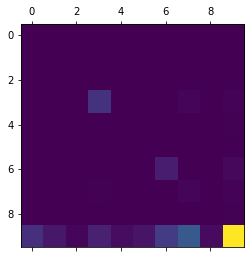

In [88]:
classifier = GradientBoostingClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)
# Train Score: 0.528315737957072
# Test Score: 0.47984152878116987

Train Score: 1.0
Test Score: 0.31968072710323936


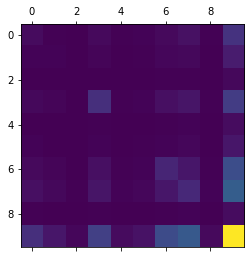

In [94]:
classifier = tree.DecisionTreeClassifier(class_weight="balanced")
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)
# Train Score: 1.0
# Test Score: 0.28096107684709826

Train Score: 1.0
Test Score: 0.500326264274062


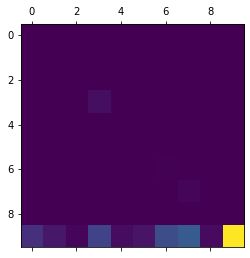

In [95]:
classifier = RandomForestClassifier(class_weight="balanced", n_estimators=100)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)
# Train Score: 1.0
# Test Score: 0.46653803305424435


Train Score: 0.7169125358316437
Test Score: 0.6096364483803309


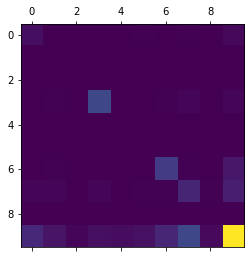

In [96]:
classifier = MLPClassifier(alpha = 1)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

# Train Score: 0.5521482961788926
# Test Score: 0.49573326901652714


Train Score: 0.5043522337971055
Test Score: 0.4954089955721277


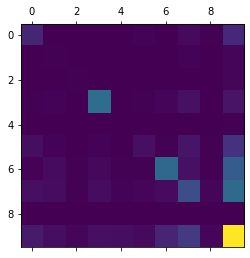

In [24]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

Train Score: 0.5357617283087465
Test Score: 0.5381612677697506


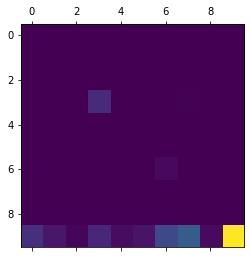

In [21]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train - np.min(x_train), y_train)
train_score = classifier.score(x_train - np.min(x_train), y_train)
test_score = classifier.score(x_test - np.min(x_test), y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test - np.min(x_test)), y_test)
plt.matshow(mat)

Train Score: 0.5158882751870237
Test Score: 0.5160801677930552


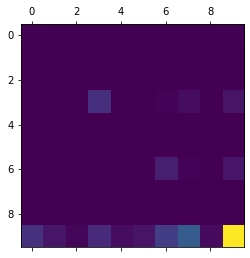

In [22]:
classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

# Train Score: 0.4643730834166006
# Test Score: 0.46228852978672086

Train Score: 0.8360833391596169
Test Score: 0.5530762060125844


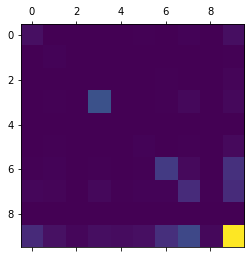

In [23]:
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)

# Train Score: 0.3260689797746615
# Test Score: 0.2601729662681322

In [ ]:
classifier = GaussianProcessClassifier()
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
mat = confusion_matrix(classifier.predict(x_test), y_test)
plt.matshow(mat)